<h1>R方评估模型精度</h1>
原文请参考[R-Squared Assess](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

In [1]:
# 导入非标准库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
% matplotlib inline

In [3]:
# 生成数据集
np.random.seed(2017)
num_sample = 100
X = np.linspace(0, np.pi, num_sample).reshape(-1, 1)
Y = np.sin(X) + 0.01 * np.random.randn(num_sample)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
poly = PolynomialFeatures()
reg = LinearRegression()
pipe = Pipeline([('poly', poly), ('regressioon', reg)])
pipe.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('regressioon', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [5]:
Y_pred_train = pipe.predict(X_train)
y_mean_train = Y_train.mean()
sse_train = np.square(Y_train - Y_pred_train).sum()
sst_train = np.square(Y_train - y_mean_train).sum()
r2_train = 1 - sse_train / sst_train

Y_pred_test = pipe.predict(X_test)
y_mean_test = Y_test.mean()
sse_test = np.square(Y_test - Y_pred_test).sum()
sst_test = np.square(Y_test - y_mean_test).sum()
r2_test = 1 - sse_test / sst_test

In [6]:
print("R-Squared of Train: {}\nR-Squared of Test: {}".format(r2_train, r2_test))

R-Squared of Train: 0.9967870805739775
R-Squared 0f Test: 0.9962147493906196


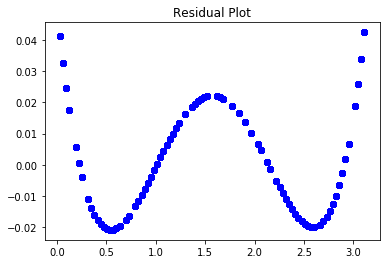

In [7]:
plt.title("Residual Plot")
_ = plt.plot(X_train, Y_train - Y_pred_train, 'bo')